<img src='./assets/images/gun_image_1.jpg'>

# Data Cleaning & EDA (I)

### Contents:
- Datasets
- Data Cleaning
- Exploratory Data Analysis
    - DateTime
    - Incidents
        - Characteristics
        - Gun Type
        - US States
        - US States Adjusted
        - US Cities
        - Location
        - Participants
- Export Datasets
- Summary and Conclusion

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Datasets

In [2]:
gun_df = pd.read_csv('./data/gun-violence-data_01-2013_03-2018.csv')

In [3]:
gun_df.shape

(239677, 29)

In [4]:
pd.set_option('display.max_colwidth', 500, 'display.max_columns', 30)
gun_df.head()

incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                                                                                                      source_url  \
0  http://www.post-gazette.com/local/south/2013/01/17/Man-arrested-in-New-Year-s-Eve-shooting-in-McKeesport/stories/201301170275   
1                                                                http://www.dailybulletin.com/article/zz/20130105/NEWS/130109127   
2                                   http://chronicle.northcoastnow.com/2013/02/14/2-men-indicted-in-new-years-day-lorain-murder/   
3                               http://www.dailydemocrat.com/20130106/aurora-shootout-killer-was-frenetic-talented-neighbor-says   
4                                         http://www.journalnow.com/news/local/article_d4c723e8-5a0f-11e2-a1fa-0019bb30f31a.html   

   incident_url_fields_missing  congressional_district  \
0                        False                    14.0   
1                        False                    43.0   
2                        False                     9.0   
3                        False                     6.0   
4                        False                     6.0   

               gun_stolen                gun_type  \
0                     NaN                     NaN   
1                     NaN                     NaN   
2  0::Unknown||1::Unknown  0::Unknown||1::Unknown   
3                     NaN                     NaN   
4  0::Unknown||1::Unknown  0::Handgun||1::Handgun   

                                                                                                                                                                                                                                                            incident_characteristics  \
0                                         Shot - Wounded/Injured||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Possession (gun(s) found during commission of other crimes)||Possession of gun by felon or prohibited person   
1                                                                                          Shot - Wounded/Injured||Shot - Dead (murder, accidental, suicide)||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Gang involvement   
2                                                                                                                                       Shot - Wounded/Injured||Shot - Dead (murder, accidental, suicide)||Shots Fired - No Injuries||Bar/club incident - in or around establishment   
3  Shot - Dead (murder, accidental, suicide)||Officer Involved Incident||Officer Involved Shooting - subject/suspect/perpetrator killed||Drug involvement||Kidnapping/abductions/hostage||Under the influence of alcohol or drugs (only applies to the subject/suspect/perpetrator )   
4                      

In [5]:
pd.set_option('display.max_colwidth', 500, 'display.max_columns', 30)
gun_df.tail()

incident_id        date      state city_or_county  \
239672      1083142  2018-03-31  Louisiana          Rayne   
239673      1083139  2018-03-31  Louisiana   Natchitoches   
239674      1083151  2018-03-31  Louisiana         Gretna   
239675      1082514  2018-03-31      Texas        Houston   
239676      1081940  2018-03-31      Maine   Norridgewock   

                                   address  n_killed  n_injured  \
239672  North Riceland Road and Highway 90         0          0   
239673                      247 Keyser Ave         1          0   
239674           1300 block of Cook Street         0          1   
239675              12630 Ashford Point Dr         1          0   
239676                    434 Skowhegan Rd         2          0   

                                              incident_url  \
239672  http://www.gunviolencearchive.org/incident/1083142   
239673  http://www.gunviolencearchive.org/incident/1083139   
239674  http://www.gunviolencearchive.org/incident/1083151   
239675  http://www.gunviolencearchive.org/incident/1082514   
239676  http://www.gunviolencearchive.org/incident/1081940   

                                                                                                                                source_url  \
239672  http://www.klfy.com/news/local/rayne-woman-charged-with-attemped-murder-for-shooting-at-victim-trying-to-visit-children/1094165597   
239673                            http://www.ksla.com/story/37854648/man-wanted-in-connection-with-natchitoches-parish-shooting-surrenders   
239674                                  http://www.nola.com/crime/index.ssf/2018/04/shooting_reported_on_st_charle.html#incart_river_index   
239675                   https://www.chron.com/news/houston-texas/houston/article/Man-found-shot-in-car-in-Houston-s-Westside-12799287.php   
239676                             https://www.centralmaine.com/2018/03/31/police-say-two-norridgewock-deaths-appear-to-be-murder-suicide/   

        incident_url_fields_missing  congressional_district  \
239672                        False                     NaN   
239673                        False                     4.0   
239674                        False                     2.0   
239675                        False                     9.0   
239676                        False                     2.0   

                    gun_stolen                gun_type  \
239672              0::Unknown              0::Unknown   
239673              0::Unknown              0::Unknown   
239674              0::Unknown              0::Unknown   
239675              0::Unknown              0::Unknown   
239676  0::Unknown||1::Unknown  0::Handgun||1::Shotgun   

                                                                      incident_characteristics  \
239672                                                               Shots Fired - No Injuries   
239673                   Shot - Dead (murder, accidental, suicide)||Institution/Group/Business   
239674                                                                  Shot - Wounded/Injured   
239675                                               Shot - Dead (murder, accidental, suicide)   
239676  Shot - Dead (murder, accidental, suicide)||Suicide^||Murder/Suicide||Domestic Violence   

        latitude         location_description  longitude  n_guns_involved  \
239672       NaN                          NaN        NaN              1.0   
239673   31.7537                    Shop Rite   -93.0836              1.0   
239674   29.9239                          NaN   -90.0442              1.0   
239675   29.7201  Vanderbilt Court apartments   -95.6110              1.0   
239676   44.7293                          NaN   -69.7691              2.0   

                                                                     notes  \
239672                                                                 NaN   
239673                                                                 NaN  

## Data Cleaning

In [6]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [7]:
gun_df.describe()

incident_id       n_killed      n_injured  congressional_district  \
count  2.396770e+05  239677.000000  239677.000000           227733.000000   
mean   5.593343e+05       0.252290       0.494007                8.001265   
std    2.931287e+05       0.521779       0.729952                8.480835   
min    9.211400e+04       0.000000       0.000000                0.000000   
25%    3.085450e+05       0.000000       0.000000                2.000000   
50%    5.435870e+05       0.000000       0.000000                5.000000   
75%    8.172280e+05       0.000000       1.000000               10.000000   
max    1.083472e+06      50.000000      53.000000               53.000000   

            latitude      longitude  n_guns_involved  state_house_district  \
count  231754.000000  231754.000000    140226.000000         200905.000000   
mean       37.546598     -89.338348         1.372442             55.447132   
std         5.130763      14.359546         4.678202             42.048117   
min        19.111400    -171.429000         1.000000              1.000000   
25%        33.903400     -94.158725         1.000000             21.000000   
50%        38.570600     -86.249600         1.000000             47.000000   
75%        41.437375     -80.048625         1.000000             84.000000   
max        71.336800      97.433100       400.000000            901.000000   

       state_senate_district  
count           207342.00000  
mean                20.47711  
std                 14.20456  
min                  1.00000  
25%                  9.00000  
50%                 19.00000  
75%                 30.00000  
max                 94.00000

- Max number of people killed is 50 and max number of people injured is 53.
- Number of guns involved is generally at 1 and the max is 400.

In [8]:
# Double check incidents with high gun numbers
print(len(gun_df[gun_df['n_guns_involved'] > 100]), 'incidents with more than 100 guns involved')
gun_df[gun_df['n_guns_involved'] > 100]

37 incidents with more than 100 guns involved


incident_id        date           state               city_or_county  \
15153        136646  2014-04-30        New York     New York (New York City)   
42862        209663  2014-10-21         Florida               Citrus Springs   
44876        419286  2014-11-04          Oregon                        Salem   
62791        319635  2015-03-27           Texas                   Georgetown   
69524        338106  2015-05-11      California                  Los Angeles   
69527        338113  2015-05-11      California                     Van Nuys   
69739        339002  2015-05-12            Iowa                 Cedar Rapids   
70733        343309  2015-05-18     Connecticut                  New Britain   
73334        352260  2015-06-03          Nevada                         Elko   
76585        364449  2015-06-24            Ohio                Spring Valley   
76975        365306  2015-06-27         Florida                        Tampa   
76976        365307  2015-06-27         Florida                        Tampa   
85777        398932  2015-08-20         Florida                      Orlando   
85795        398933  2015-08-20         Florida                      Orlando   
86192        400162  2015-08-22            Ohio                    Cleveland   
86768        412224  2015-08-26            Ohio                  Springfield   
91849        421931  2015-09-26      California                      Fontana   
94451        430788  2015-10-14        New York                     Brooklyn   
94543        431754  2015-10-15      California                   Sacramento   
95847        437442  2015-10-24      California                    San Diego   
98804        449889  2015-11-12      California                       Clovis   
99968        451099  2015-11-21        Maryland               Upper Marlboro   
101763       459274  2015-12-04        Michigan  Rochester (Rochester Hills)   
102553       463821  2015-12-10    South Dakota                  Sioux Falls   
102885       465352  2015-12-12   Massachusetts                    Worcester   
103796       471090  2015-12-18  North Carolina                        Kelly   
104383       471064  2015-12-22        Maryland                    Baltimore   
110670       499315  2016-02-03   Massachusetts                    Stoughton   
119424       533711  2016-04-02        Illinois                      Chicago   
125514       557815  2016-05-11      California                  Los Angeles   
125526       557814  2016-05-11      California                  Los Angeles   
125527       557813  2016-05-11      California                  Los Angeles   
134714       600200  2016-07-09      California                      Anaheim   
134715       600199  2016-07-09      California                      Anaheim   
134718       600223  2016-07-09      California                      Anaheim   
139448       623687  2016-08-06     Connecticut                    New Haven   
139493       623977  2016-08-06        New York                        Bronx   

                               address  n_killed  n_injured  \
15153                              NaN         0          0   
42862                              NaN         0          0   
44876                 1060 12th St. SE         0          0   
62791              3301 Northwest Blvd         0          0   
69524   2379 West Washington Boulevard         0          0   
69527                14750 Sherman Way         0          0   
69739              1105 60th Avenue SW         0          0   
70733               515 John Downey Dr         0          0   
73334                              NaN         0          0   
76585      2300 block of Schnebly Road         0          0   
76975                              NaN         0          0   
76976                              NaN         0          0   
85777                              NaN         0          0   
85795                              NaN         0          0   
86192              450

Entries with high number of guns seem to be legit and corresponds with the news articles. They mainly revolve around the confiscation of firearms by the police and number of people killed/injured is at 0. These incidents with >100 guns involved are also a very tiny proportion of the entire dataset.

### Identify null values

In [9]:
# Put null values into df
total_null =  gun_df.isnull().sum().sort_values(ascending = False)
percent_null = (gun_df.isnull().sum()/gun_df.shape[0]*100).sort_values(ascending = False)
missing_gun_data = pd.concat([total_null, percent_null], axis=1, keys = ['Total Null', 'Percent Null'])
missing_gun_data

Total Null  Percent Null
participant_relationship         223903     93.418643
location_description             197588     82.439283
participant_name                 122253     51.007397
gun_stolen                        99498     41.513370
gun_type                          99451     41.493760
n_guns_involved                   99451     41.493760
participant_age                   92298     38.509327
notes                             81017     33.802576
participant_age_group             42119     17.573234
state_house_district              38772     16.176771
participant_gender                36362     15.171251
state_senate_district             32335     13.491073
participant_status                27626     11.526346
participant_type                  24863     10.373544
address                           16497      6.883013
congressional_district            11944      4.983373
latitude                           7923      3.305699
longitude                          7923      3.305699
sources                             609      0.254092
source_url                          468      0.195263
incident_characteristics            326      0.136016
incident_url_fields_missing           0      0.000000
incident_url                          0      0.000000
n_injured                             0      0.000000
n_killed                              0      0.000000
city_or_county                        0      0.000000
state                                 0      0.000000
date                                  0      0.000000
incident_id                           0      0.000000

- Columns with >50% null values will be dropped i.e. `participant_relationship`, `location_description` and `participant_name`. 
- Based on the [data dictionary](https://github.com/jamesqo/gun-violence-data), some columns are redundant and will be dropped: `incident_url_fields_missing`, `source_url` and `sources`. `incident_url` will be kept to reference the incidents if needed and the source links can be found in the webpage too.  


I'll be taking a look at the rest of the columns to understand the dataset further.

#### Guns

In [10]:
# Review gun_type column
gun_df['gun_type'].unique()

array([nan, '0::Unknown||1::Unknown', '0::Handgun||1::Handgun', ...,
       '0::Handgun||1::Handgun||2::Unknown||3::Unknown||4::Unknown||5::Unknown||6::Unknown||7::Unknown||8::Unknown||9::Unknown||10::Unknown||11::Unknown||12::Unknown||13::Unknown||14::Unknown||15::Unknown||16::Unknown||17::Unknown||18::Unknown||19::Unknown||20::Unknown||21::Unknown||22::Unknown||23::Unknown||24::Unknown',
       '0::25 Auto||1::Shotgun||2::Shotgun||3::Shotgun',
       '0::357 Mag||1::44 Mag||2::45 Auto||3::Rifle||4::Rifle||5::Rifle||6::Rifle||7::Rifle'],
      dtype=object)

In [11]:
# Review rows with NaN gun type
gun_df[gun_df['gun_type'].isnull()].head(2)

incident_id        date         state city_or_county  \
0       461105  2013-01-01  Pennsylvania     Mckeesport   
1       460726  2013-01-01    California      Hawthorne   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   

                                                                                                                      source_url  \
0  http://www.post-gazette.com/local/south/2013/01/17/Man-arrested-in-New-Year-s-Eve-shooting-in-McKeesport/stories/201301170275   
1                                                                http://www.dailybulletin.com/article/zz/20130105/NEWS/130109127   

   incident_url_fields_missing  congressional_district gun_stolen gun_type  \
0                        False                    14.0        NaN      NaN   
1                        False                    43.0        NaN      NaN   

                                                                                                                                                                                                                     incident_characteristics  \
0  Shot - Wounded/Injured||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Possession (gun(s) found during commission of other crimes)||Possession of gun by felon or prohibited person   
1                                                   Shot - Wounded/Injured||Shot - Dead (murder, accidental, suicide)||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Gang involvement   

   latitude location_description  longitude  n_guns_involved  \
0   40.3467                  NaN   -79.8559              NaN   
1   33.9090                  NaN  -118.3330              NaN   

                                                        notes participant_age  \
0      Julian Sims under investigation: Four Shot and Injured           0::20   
1  Four Shot; One Killed; Unidentified shooter in getaway car           0::20   

                                                  participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+   
1                0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+   

                     participant_gender   participant_name  \
0  0::Male||1::Male||3::Male||4::Female     0::Julian Sims   
1                               0::Male  0::Bernard Gillis   

  participant_relationship  \
0                      NaN   
1                      NaN   

                                            participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injured||4::Injured   
1                0::Killed||1::Injured||2::Injured||3::Injured   

                                                 participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect   
1  0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect   

                                                                                                                                                                                                                                                                                                                         sources  \
0     http://pittsburgh.cbslocal.com/2013/01/01/4-people-shot-in-mckeesport/||http://www.wtae.com/news/local/allegheny/U-S-Marshals-task-force-arrests-New-Year-s-party-shooting-suspect/17977588||http://www.post-gazette.com/local/south/2013/01/17/Man-arrested-in-New-Year-s-Eve-shooting-in-McKeesport/stories/201301170275   
1  http://losangeles.cbslocal.com/2013/01/01/man-killed-3-wounded-at-nye-party-in-hawthorne/||ht

The columns `gun_type` and `n_guns_involved` have the same number of null values and doing a quick check on a handful of the individual incidents, guns were definitely involved and hence I will be replacing NaN with `0::Unknown` instead.

In [12]:
# Replace null values in `gun_type` with `0::Unknown`
gun_df['gun_type'] = gun_df['gun_type'].fillna('0::Unknown')
gun_df['gun_type'].isnull().sum()

0

#### Age

Since there are 2 columns with age info. I will be dropping `participant_age` for modelling since there are more null values in this columns and using `participant_age_group` as a feature makes more sense.

In [13]:
gun_df[gun_df['participant_age_group'].isnull()].head(2)

incident_id        date       state city_or_county  \
7        479374  2013-01-21   Louisiana    New Orleans   
38       482926  2013-03-16  California           Galt   

                                                address  n_killed  n_injured  \
7   LaSalle Street and Martin Luther King Jr. Boulevard         0          5   
38                                          Dover Drive         0          7   

                                         incident_url  \
7   http://www.gunviolencearchive.org/incident/479374   
38  http://www.gunviolencearchive.org/incident/482926   

                                                                                      source_url  \
7                 http://www.nola.com/crime/index.ssf/2013/01/nopd_4_people_shot_in_central.html   
38  http://fox40.com/2013/03/16/mass-casualty-incident-declared-in-galt-after-reported-shooting/   

    incident_url_fields_missing  congressional_district gun_stolen  \
7                         False                     2.0        NaN   
38                        False                     9.0        NaN   

      gun_type  \
7   0::Unknown   
38  0::Unknown   

                                                                                                                                              incident_characteristics  \
7   Shot - Wounded/Injured||Drive-by (car to street, car to car)||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)   
38  Shot - Wounded/Injured||Drive-by (car to street, car to car)||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)   

    latitude location_description  longitude  n_guns_involved  \
7    29.9435                  NaN   -90.0836              NaN   
38   38.2436                  NaN  -121.3120              NaN   

                                                                                                          notes  \
7   Unprovoked drive-by results in multiple teens and young adults injured. No source with names or exact ages.   
38                                                                                                          NaN   

   participant_age participant_age_group  \
7              NaN                   NaN   
38             NaN                   NaN   

                             participant_gender participant_name  \
7   0::Male||1::Male||2::Male||3::Male||4::Male              NaN   
38                                          NaN              NaN   

   participant_relationship  \
7                       NaN   
38                      NaN   

                                                                    participant_status  \
7                           0::Injured||1::Injured||2::Injured||3::Injured||4::Injured   
38  0::Injured||1::Injured||2::Injured||3::Injured||4::Injured||5::Injured||6::Injured   

                                                               participant_type  \
7     0::Victim||1::Victim||2::Victim||3::Victim||4::Victim||5::Subject-Suspect   
38  0::Victim||1::Victim||2::Victim||3::Victim||4::Victim||5::Victim||6::Victim   

                                                                                                                                                                                                                           sources  \
7   http://www.huffingtonpost.com/2013/01/21/new-orleans-mlk-day-shooting_n_2521750.html||http://www.fox8live.com/story/20640921/nopd-4-shot-alomg||http://www.nola.com/crime/index.ssf/2013/01/nopd_4_people_shot_in_central.html   
38                                  http://www.kcra.com/news/local-news/news-sacramento/7-injured-in-Galt-drive-by-shooting/19349066||http://fox40.com/2013/03/16/mass-casualty-incident-declared-in-galt-after-reported-shooting/   

    state_house_district  state_senate_district  
7                   93.0                    5.0  
38                   9.0                    5.0

In [14]:
# Replace null values in `participant_age_group` with `0::Unknown`
gun_df['participant_age_group'] = gun_df['participant_age_group'].fillna('0::Unknown')
gun_df['participant_age_group'].isnull().sum()

0

### Timeframe

In [15]:
# Convert date column to datetime
gun_df['date'] = pd.to_datetime(gun_df['date'])

# Removing 2013 from dataset as there seems to be missing values
gun_df = gun_df[gun_df['date'] >= '2014-01-01']
print(gun_df.shape)
gun_df.head(1) #confirmed that 2013 has been removed

(239399, 29)


incident_id       date     state city_or_county  \
278        95289 2014-01-01  Michigan       Muskegon   

                         address  n_killed  n_injured  \
278  300 block of Monroe Avenue          0          0   

                                         incident_url  \
278  http://www.gunviolencearchive.org/incident/95289   

                                                                                  source_url  \
278  http://www.mlive.com/news/muskegon/index.ssf/2014/01/police_celebratory_gunfire_in.html   

     incident_url_fields_missing  congressional_district gun_stolen  \
278                        False                     2.0        NaN   

       gun_type   incident_characteristics  latitude location_description  \
278  0::Unknown  Shots Fired - No Injuries   43.2301                  NaN   

     longitude  n_guns_involved                 notes participant_age  \
278   -86.2514              NaN  bullets entered home             NaN   

    participant_age_group participant_gender participant_name  \
278          0::Adult 18+          0::Female              NaN   

    participant_relationship participant_status participant_type  \
278                      NaN        0::Unharmed        0::Victim   

                                                                                     sources  \
278  http://www.mlive.com/news/muskegon/index.ssf/2014/01/police_celebratory_gunfire_in.html   

     state_house_district  state_senate_district  
278                  92.0                   34.0

## Exploratory Data Analysis

### Datetime

In [16]:
# Create function to convert date column to date time and new columns for day, month, year

def convert_date(df):  
    df['year'] = df['date'].map(lambda x: x.strftime('%Y')) 
    df['month'] = df['date'].map(lambda x: x.strftime('%b')) 
    df['day'] = df['date'].map(lambda x: x.strftime('%d')) 
    df['day_of_week'] = df['date'].map(lambda x: x.strftime('%a'))

In [17]:
# Apply convert date function to gun_df 
convert_date(gun_df)
gun_df[['date', 'year', 'month', 'day', 'day_of_week']].head()

date  year month day day_of_week
278 2014-01-01  2014   Jan  01         Wed
279 2014-01-01  2014   Jan  01         Wed
280 2014-01-01  2014   Jan  01         Wed
281 2014-01-01  2014   Jan  01         Wed
282 2014-01-01  2014   Jan  01         Wed

In [18]:
# Order day_of_week column
gun_df['day_of_week'] = pd.Categorical(gun_df['day_of_week'], 
                                       categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [19]:
# Review data by year
gun_df['year'].value_counts()

2017    61401
2016    58763
2015    53579
2014    51854
2018    13802
Name: year, dtype: int64

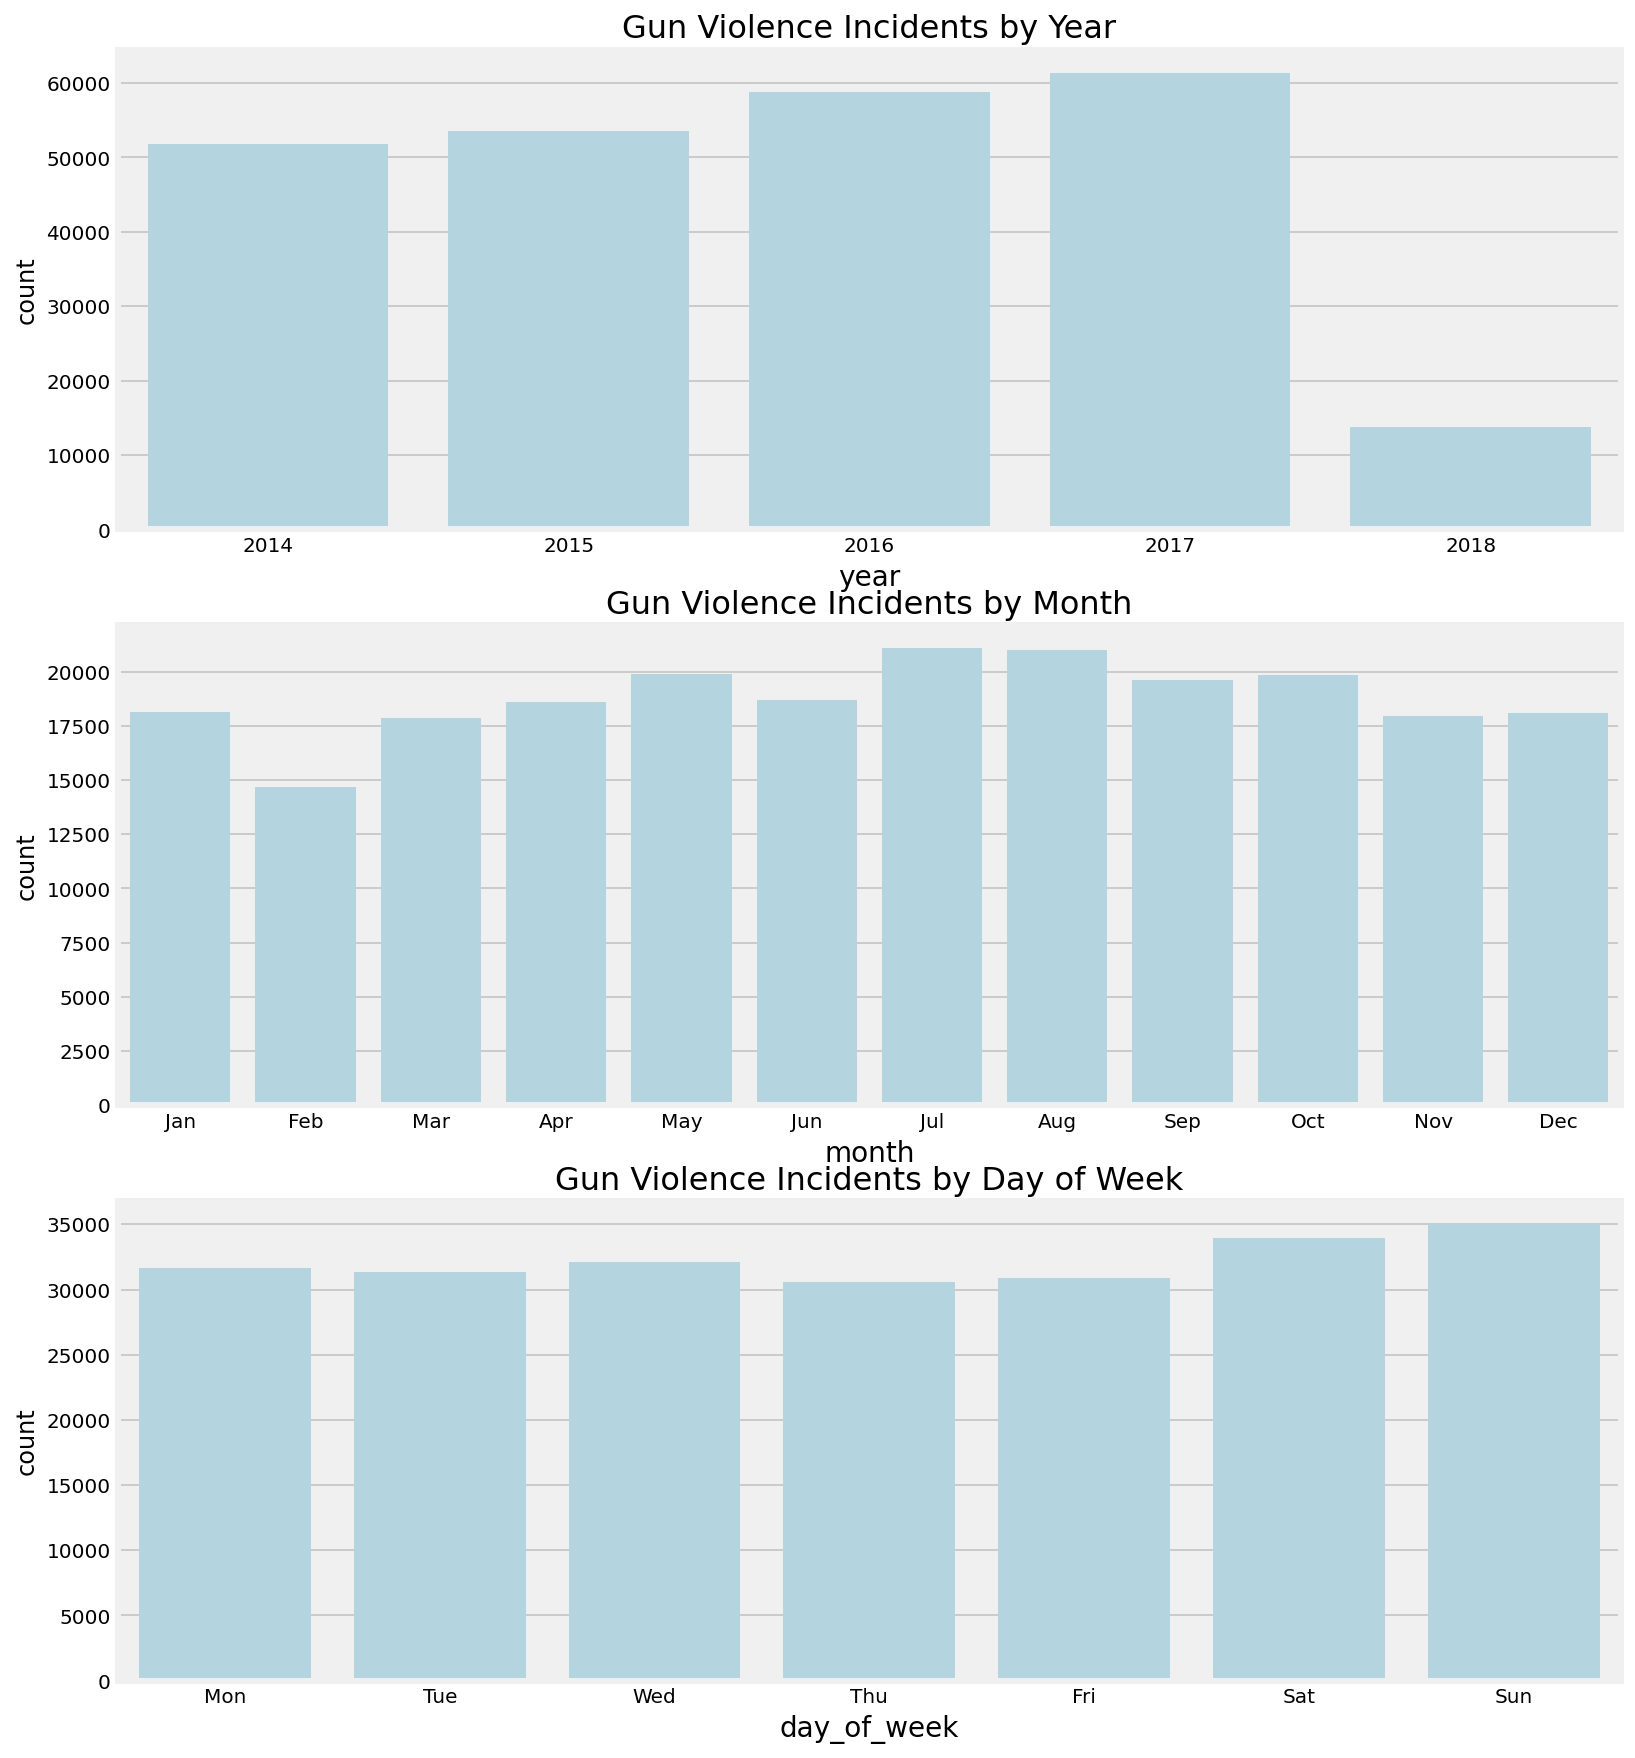

In [20]:
# Plot countplots for Year/Month/Day of Week

plt.subplots(figsize=(12,15))

# By year
ax1 = plt.subplot(3,1,1)
sns.countplot(x='year', data=gun_df, color='lightblue').set_xlabel('year', size=14)
plt.title('Gun Violence Incidents by Year', size=16)
plt.xticks(size=10)

# By month excluding 2018 since it's not the complete year
ax2 = plt.subplot(3,1,2)
sns.countplot(x='month', data=gun_df[gun_df['year'] != '2018'], color='lightblue').set_xlabel('month', size=14)
plt.title('Gun Violence Incidents by Month', size=16)
plt.xticks(size=10)

# By month excluding 2018 since it's not the complete year
ax3 = plt.subplot(3,1,3)
sns.countplot(x='day_of_week', data=gun_df[gun_df['year'] != '2018'], color='lightblue').set_xlabel('day_of_week', size=14)
plt.title('Gun Violence Incidents by Day of Week', size=16)
plt.xticks(size=10);


- Number of incidents seem to be increasing YoY from 2014 to 2017
- Peak of incidents happen in Jul & Aug and on the weekends

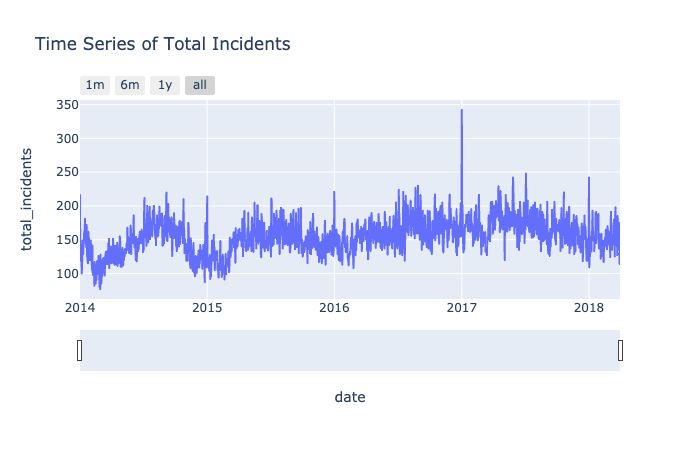

In [21]:
# Create df for total number of incidents by date
by_date_total_incidents_df = pd.DataFrame(gun_df.groupby('date')['n_killed'].count())
by_date_total_incidents_df = by_date_total_incidents_df.reset_index()
by_date_total_incidents_df.rename(columns = {'index':'date',
                                             'n_killed':'total_incidents'
                                            }, inplace=True)

# Plot time series for total number of incidents by date
fig = px.line(by_date_total_incidents_df, x='date', y='total_incidents', title='Time Series of Total Incidents')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
iplot(fig); #to use plotly interactive graph, download notebook
fig.show("png");

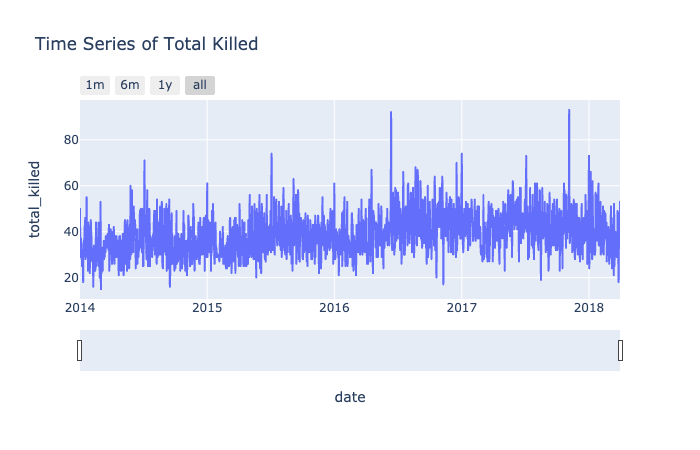

In [22]:
# Create df for total number killed by date
by_date_killed_df = pd.DataFrame(gun_df.groupby('date')['n_killed'].sum())
by_date_killed_df = by_date_killed_df.reset_index()
by_date_killed_df.rename(columns = {'index':'date',
                                 'n_killed':'total_killed'
                                }, inplace=True)

# Plot time series for total number killed by date
fig = px.line(by_date_killed_df, x='date', y='total_killed', title='Time Series of Total Killed')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
iplot(fig); #to use plotly interactive graph, download notebook
fig.show("png");

Number of incidents seem to be increasing YoY from 2014 to 2017
Peak of incidents happen in Jul & Aug and on the weekendsThere seems to be consistent peaks in July and looking deeper, it is usually around the Fourth of July weekend aka [Indenpendence Day in the US](https://en.wikipedia.org/wiki/Independence_Day_(United_States)). Doing a quick Google search, there are news articles around [gun violence flaring up during the Fourth of July weekend](https://www.theguardian.com/world/2014/jul/07/gun-violence-fourth-of-july-weekend). Based on research, it looks like there's correlation between shootings and the holidays and this seems to be still the case in 2020 where [cities saw a spike in gun violence over Memorial Day weekend](https://momsdemandaction.org/cities-see-spike-in-gun-violence-over-memorial-day-weekend-as-shootings-continue-during-the-pandemic/) in May.

## Incidents

### Characteristics

In [23]:
gun_df['incident_characteristics'].unique()

array(['Shots Fired - No Injuries', 'Officer Involved Incident',
       'Shot - Dead (murder, accidental, suicide)', ...,
       'Institution/Group/Business||Shots Fired - No Injuries||Gang involvement||ATF/LE Confiscation/Raid/Arrest',
       'Shot - Dead (murder, accidental, suicide)||Home Invasion||Home Invasion - Resident killed||Defensive Use||Defensive Use - WITHOUT a gun||Armed robbery with injury/death and/or evidence of DGU found',
       'Shot - Wounded/Injured||Officer Involved Incident||Officer Involved Incident - Weapon involved but no shots fired||Officer Involved Shooting - subject/suspect/perpetrator surrender at standoff||ATF/LE Confiscation/Raid/Arrest'],
      dtype=object)

In [24]:
gun_df['incident_characteristics'].value_counts().head(10)

Shot - Wounded/Injured                                                                                                                   47541
Shot - Dead (murder, accidental, suicide)                                                                                                23014
Shots Fired - No Injuries                                                                                                                15690
Shot - Wounded/Injured||Drive-by (car to street, car to car)                                                                              5121
Armed robbery with injury/death and/or evidence of DGU found                                                                              3438
Shot - Wounded/Injured||Shot - Dead (murder, accidental, suicide)                                                                         3219
Shot - Wounded/Injured||Armed robbery with injury/death and/or evidence of DGU found                                                      2920

In [25]:
# Identify non-shooting incidents
# gun_df[gun_df['incident_characteristics'].str.contains('Non-Shooting Incident') == True]

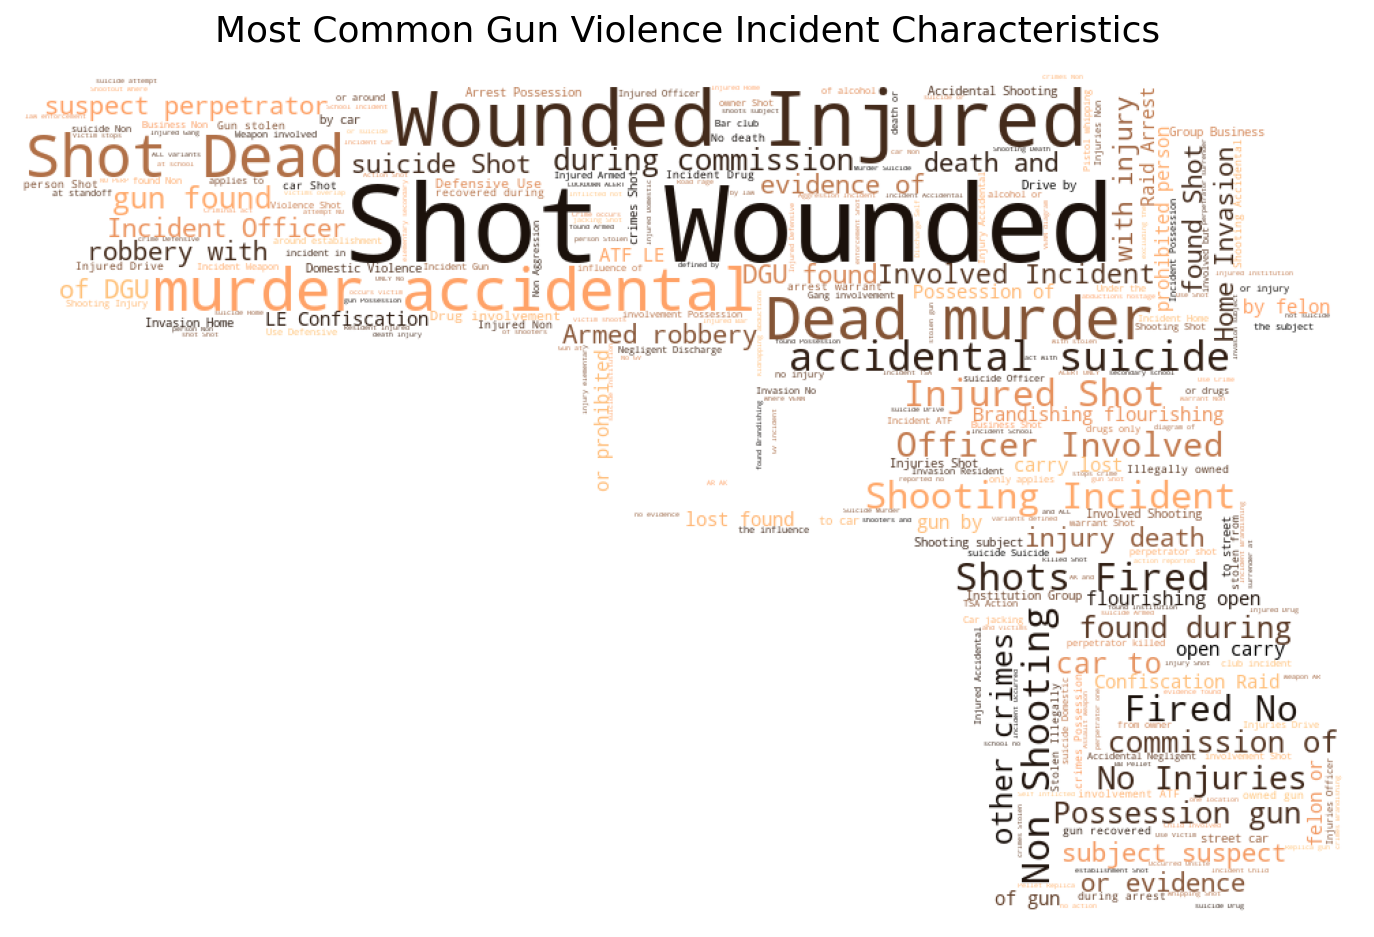

In [26]:
gun_mask = np.array(Image.open('./assets/images/gun_mask.jpg'))

txt = " ".join(gun_df['incident_characteristics'].dropna())
wordcloud = WordCloud(mask=gun_mask,
                      max_words=1000,
                      stopwords=STOPWORDS,
                      colormap='copper',
                      background_color='white',
                      random_state=42).generate(txt)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Common Gun Violence Incident Characteristics', fontsize=18);

### Gun Type

In [27]:
# Aggregate number of incidents, killed and injured
gun_type_df = gun_df.groupby('gun_type').agg({'n_killed':'sum', 
                                              'n_injured':'sum', 
                                              'incident_id':'count'}).reset_index().rename(columns={'incident_id':'count'})

results = {}

for i, entry in gun_type_df.iterrows():
    guns = entry['gun_type'].split("||")
    for gun in guns:
        if "Unknown" in gun:
            continue
        gun = gun.replace("::",":").replace("|1","")
        gun_type = gun.split(":")[1]
        if gun_type not in results: 
            results[gun_type] = {'killed' : 0, 'injured' : 0, 'incidents' : 0}
        results[gun_type]['killed'] += entry['n_killed']
        results[gun_type]['injured'] +=  entry['n_injured']
        results[gun_type]['incidents'] +=  entry['count']

gun_names = list(results.keys())
incidents = [entry['incidents'] for entry in list(results.values())]
killed = [entry['killed'] for entry in list(results.values())]
injured = [entry['injured'] for entry in list(results.values())]

# Create new column `harm` to show %injured/killed
harm = [] 
for i, x in enumerate(incidents):
    harm.append((killed[i] + injured[i]) / x)

    
# Create df for gun type
df = pd.DataFrame({'gun_names': gun_names, 
                   'incidents': incidents,
                   'killed': killed,
                   'injured': injured,
                   'harm': harm})
df.sort_values('harm', ascending=False)

gun_names  incidents  killed  injured      harm
13  223 Rem [AR-15]       1610     359      412  0.478882
14     7.62 [AK-47]        934     157      257  0.443255
22          Shotgun       4264     628      954  0.371013
8             40 SW       2741     338      655  0.362277
16          Handgun      25029    3286     5638  0.356546
17        30-30 Win        110      22       16  0.345455
10          45 Auto       2363     322      428  0.317393
11              9mm       6447     816     1188  0.310842
12             10mm         50       7        8  0.300000
2             22 LR       3351     369      626  0.296926
15            Rifle       5270     672      882  0.294877
24        30-06 Spr         84      11       13  0.285714
1          20 gauge        207      23       36  0.285024
18        410 gauge         96       6       20  0.270833
5           357 Mag        824     105      118  0.270631
9            44 Mag        195      24       28  0.266667
0          12 gauge       1113     134      151  0.256065
6            38 Spl       1810     183      250  0.239227
3           25 Auto        612      46       90  0.222222
21          308 Win         91      11        8  0.208791
19            Other       1060      81      124  0.193396
4           32 Auto        489      34       59  0.190184
7          380 Auto       2395     152      282  0.181211
25         28 gauge          6       0        1  0.166667
20         16 gauge         32       1        3  0.125000
23          300 Win         23       1        1  0.086957

The most common gun that was reported is the handgun. However, it is also worth noting that other gun types like 223 Rem [AR-15] and 7.62 [AK-47] and  have a higher harm rate i.e. >40% of incidents results in a death and/or injury.

### US States

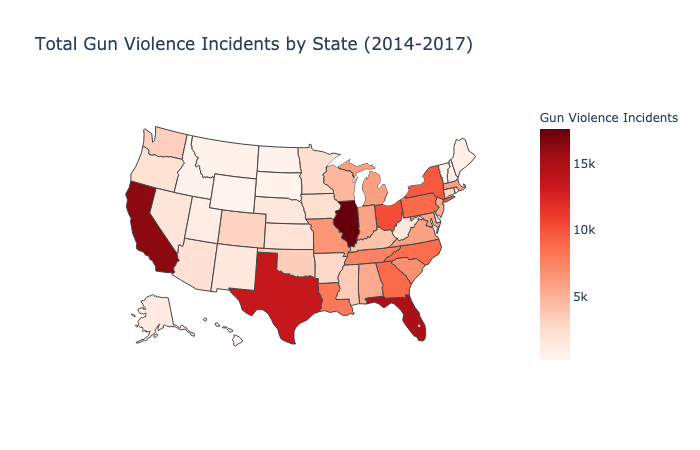

In [28]:
# Create df for gun violence incident counts by state
states_count = gun_df['state'].value_counts()
states_df = pd.DataFrame()
states_df['state'] = states_count.index
states_df['counts'] = states_count.values

# US State abbreviation dictionary credits to: https://gist.github.com/rogerallen/1583593
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Apply US state abbreviation dictionary to state column
states_df['state_code'] = states_df['state'].apply(lambda x : us_state_abbrev[x])

# Plot US map
fig = go.Figure(data=go.Choropleth(
    locations=states_df['state_code'], # Spatial coordinates
    z = states_df['counts'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # Set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Gun Violence Incidents",
))

fig.update_layout(
    title_text = 'Total Gun Violence Incidents by State (2014-2017)',
    geo_scope='usa', # limit map scope to USA
)

iplot(fig); #to use plotly interactive graph, download notebook
fig.show("png");

In [29]:
states_df.head()

state  counts state_code
0    Illinois   17538         IL
1  California   16267         CA
2     Florida   15016         FL
3       Texas   13566         TX
4        Ohio   10234         OH

The top 5 states with the highest gun violence incidence counts are Illinois (17.5k), California (16.3k), Florida (15k), Texas (13.6k) and Ohio (10.2k). However, as these are absolute values, we will look at gun violence incidents per 100,000 people next.

### US States Adjusted

In [30]:
# Bring in population dataset from second notebook
population_df = pd.read_csv('./data/population_cleaned.csv')

In [31]:
pop_2017_df = population_df[population_df['year'] == 2017]

In [32]:
# Combined population to states_df 
states_pop_df = pd.merge(states_df, pop_2017_df, on=['state'], how='left')
states_pop_df.drop(['Unnamed: 0', 'year'], axis=1, inplace=True)

In [33]:
states_pop_df.head()

state  counts state_code  population
0    Illinois   17538         IL    12802023
1  California   16267         CA    39536653
2     Florida   15016         FL    20984400
3       Texas   13566         TX    28304596
4        Ohio   10234         OH    11658609

In [34]:
states_pop_df['incidents_adjusted'] = states_pop_df.apply(lambda x : float(x['counts'])*100000 / x['population'], 
                                                          axis=1)

In [35]:
states_pop_df = states_pop_df[states_pop_df['state_code'] != 'DC']
states_pop_df.sort_values('incidents_adjusted', ascending=False).head(10)

state  counts state_code  population  incidents_adjusted
39          Alaska    1349         AK      739795          182.347813
35        Delaware    1682         DE      961939          174.855162
9        Louisiana    8094         LA     4684333          172.788741
11  South Carolina    6934         SC     5024369          138.007380
0         Illinois   17538         IL    12802023          136.993974
22     Mississippi    3597         MS     2984100          120.538856
10       Tennessee    7616         TN     6715984          113.401104
18         Alabama    5469         AL     4874747          112.190438
12        Missouri    6621         MO     6113532          108.300734
17        Maryland    5793         MD     6052177           95.717624

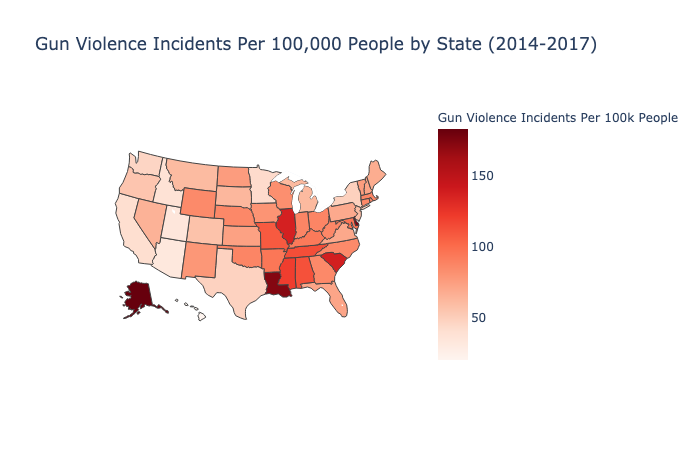

In [36]:
# Plot US map
fig = go.Figure(data=go.Choropleth(
    locations=states_pop_df['state_code'], # Spatial coordinates
    z = states_pop_df['incidents_adjusted'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # Set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Gun Violence Incidents Per 100k People",
))

fig.update_layout(
    title_text = 'Gun Violence Incidents Per 100,000 People by State (2014-2017)',
    geo_scope='usa', # limit map scope to USA
)

iplot(fig); #to use plotly interactive graph, download notebook
fig.show("png");

Looking at gun violence incidents per 100k people, the top 5 states changes except for Illinois. Alaska, Delaware and Louisiana have >170 cases reported per 100k people. States like Alaska, Lousiana, South Carolina and Mississippi are are as states with [weak gun laws and high gun death rates](https://lawcenter.giffords.org/scorecard/#AZ).

### US Cities

In [37]:
gun_df['city_or_county'].value_counts().head(20)

Chicago         10799
Baltimore        3938
Washington       3274
New Orleans      3067
Philadelphia     2954
Houston          2498
Saint Louis      2496
Milwaukee        2486
Jacksonville     2447
Memphis          2382
Columbus         2251
Indianapolis     1916
Detroit          1830
Cleveland        1784
Springfield      1754
Boston           1737
San Antonio      1628
Oakland          1497
Louisville       1425
Brooklyn         1410
Name: city_or_county, dtype: int64

Chicago has a significantly higher number of gun violence incidents than the rest of the cities. A 2017 University of Chicago Crime Lab study was able to quantify how much of the city’s gunfire victimizes residents of struggling neighborhoods: Five South and West side communities with 9% of Chicago’s population (Austin, Englewood, New City, West Englewood and Greater Grand Crossing) accounted for nearly half the city’s increase in 2016 homicides. [(Source)](https://www.chicagotribune.com/opinion/editorials/ct-edit-shooting-chicago-violence-police-20180807-story.html)

### Location

Not all gun incident records have values for location description so I won't be using it for modelling but I'd like to take a look at the common locations.

In [38]:
# Number of rows with location descriptions
gun_df['location_description'].notnull().sum()

42001

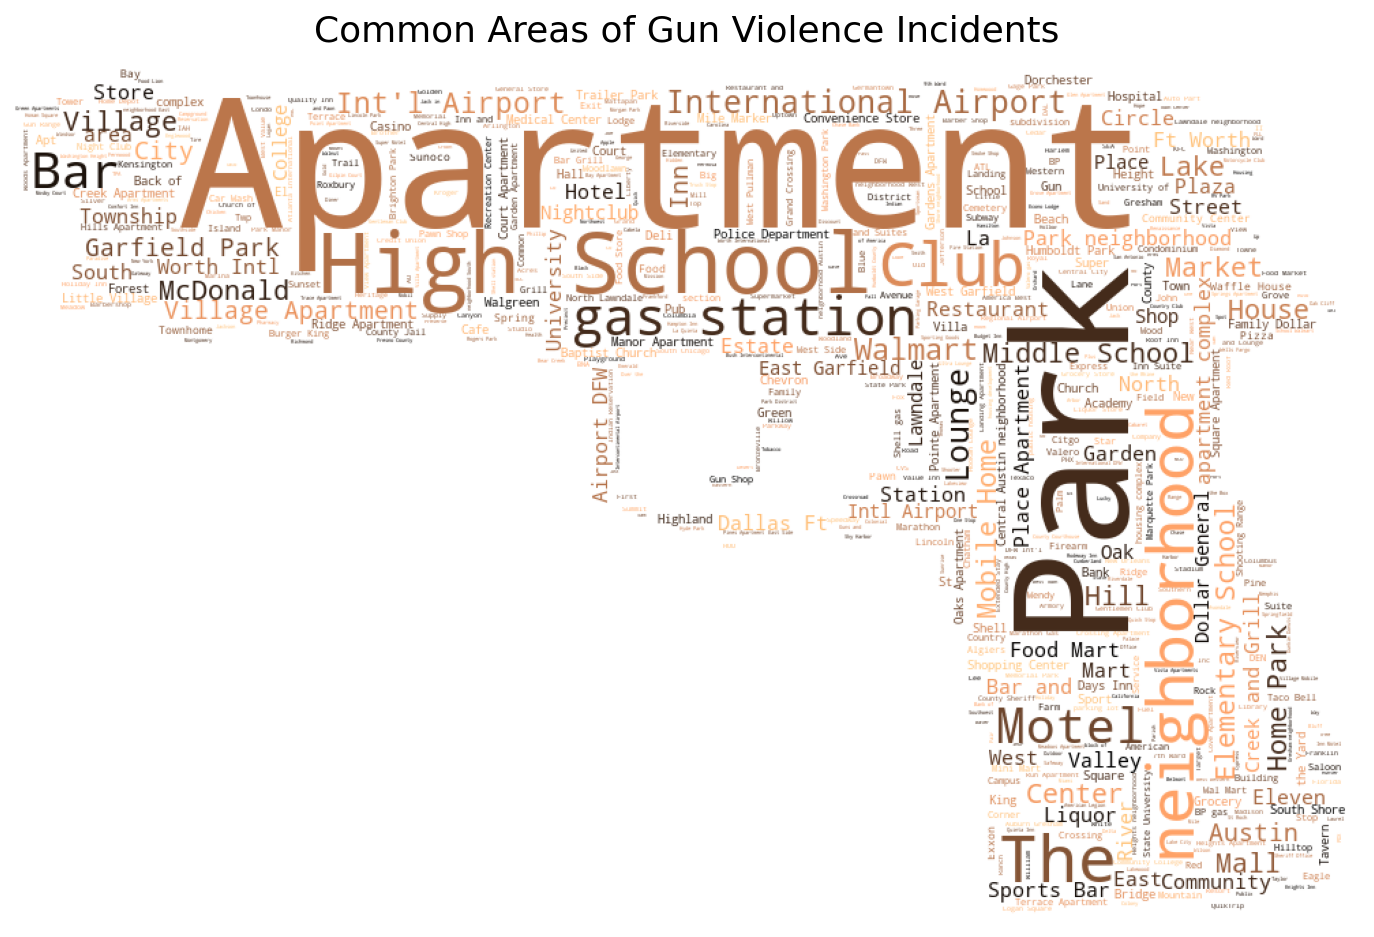

In [39]:
# For all incidents
gun_mask = np.array(Image.open('./assets/images/gun_mask.jpg'))

txt = " ".join(gun_df['location_description'].dropna())
wordcloud = WordCloud(mask=gun_mask,
                      max_words=1000,
                      stopwords=STOPWORDS,
                      colormap='copper',
                      background_color='white',
                      random_state=42).generate(txt)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Common Areas of Gun Violence Incidents', fontsize=18);

Review gun incidents where there's a casualty to see if there's a difference in location description.

In [40]:
# Identify only rows with gun deaths or injuries
gun_df2 = gun_df[(gun_df['n_killed'] > 0) | (gun_df['n_injured'] > 0)]

In [41]:
# Number of rows with location descriptions where there is a death or injury
gun_df2['location_description'].notnull().sum()

26056

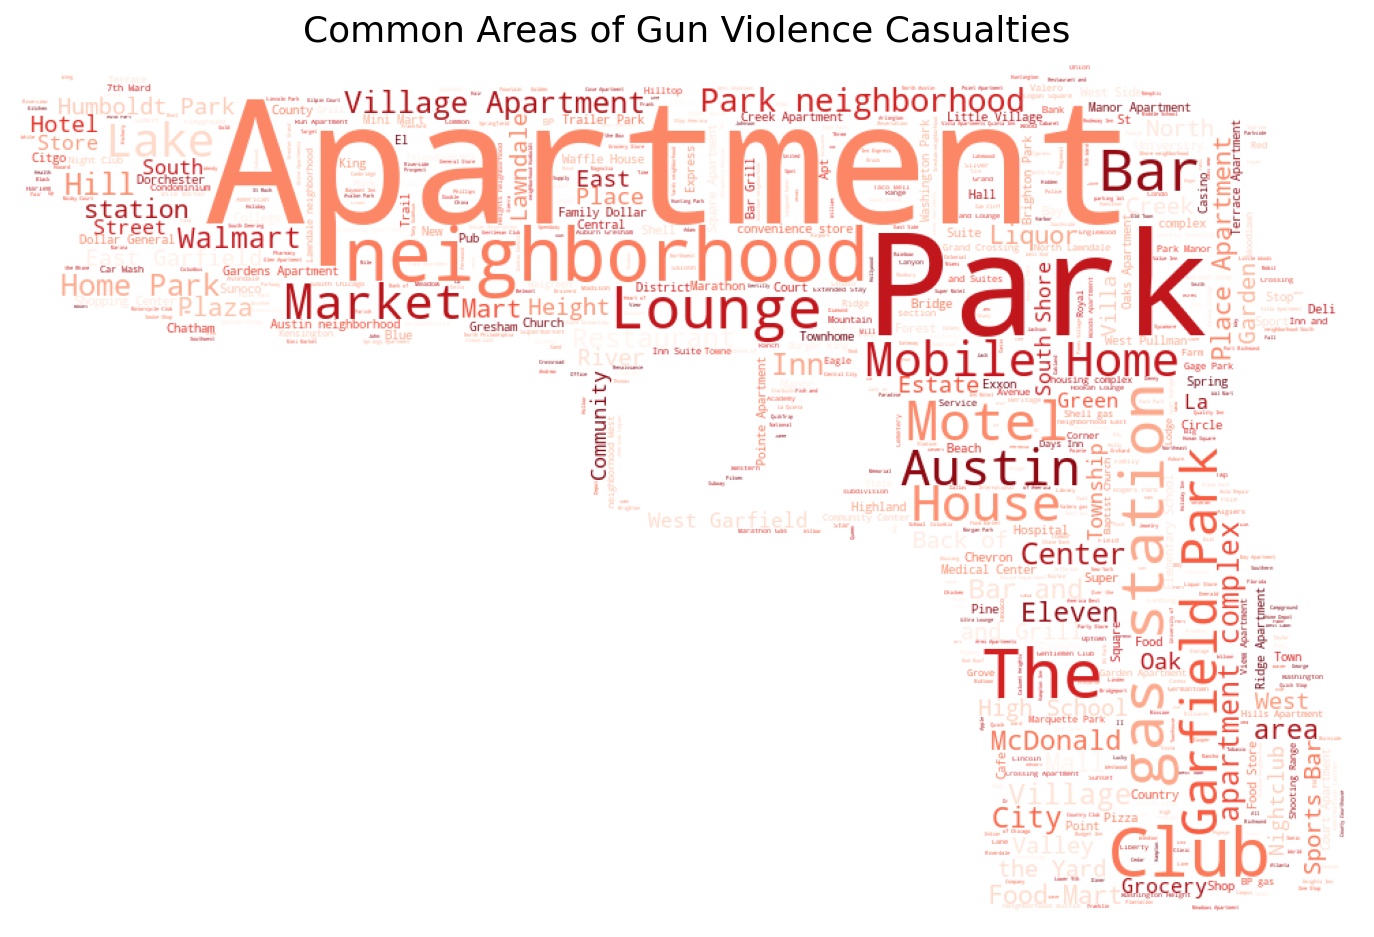

In [42]:
gun_mask_2 = np.array(Image.open('./assets/images/gun_mask.jpg'))

txt = " ".join(gun_df2['location_description'].dropna())
wordcloud = WordCloud(mask=gun_mask_2,
                      max_words=1000,
                      stopwords=STOPWORDS,
                      colormap='Reds_r',
                      background_color='white',
                      random_state=42).generate(txt)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Common Areas of Gun Violence Casualties', fontsize=18);

After excluding incidents with no casualties, airports are no longer a common area. This makes sense because it's likely that the incidents reported at airports are when firearms are confiscated by the police. Casualties seem to occur around apartments, neighbourhoods and parks. This indicates that casualties are neighbourhood dependent. 

### Participants

#### Age

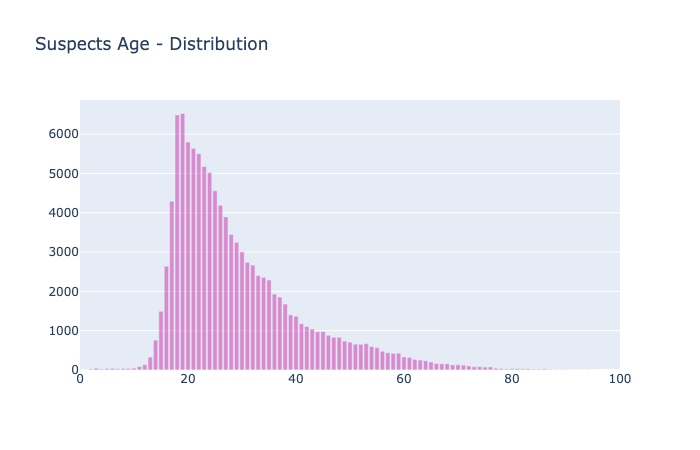

In [43]:
def get_user_mapping(txt):
    if txt == "None":
        return {}
    mapping = {}
    for d in txt.split("||"):
        try:
            key = d.split("::")[0]
            val = d.split("::")[1]
            if key not in mapping:
                mapping[key] = val
        except:
            pass
    return mapping

gun_df['participant_type'] = gun_df['participant_type'].fillna("None")
gun_df['participant_type_map'] = gun_df['participant_type'].apply(lambda x : get_user_mapping(x))
gun_df['participant_age'] = gun_df['participant_age'].fillna("None")
gun_df['participant_age_map'] = gun_df['participant_age'].apply(lambda x : get_user_mapping(x))
gun_df['participant_gender'] = gun_df['participant_gender'].fillna("None")
gun_df['participant_gender_map'] = gun_df['participant_gender'].apply(lambda x : get_user_mapping(x))

## Finding the Suspect Age Groups
suspect_age_groups = {}
for i, row in gun_df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_age_map']:
            ag = row['participant_age_map'][suspect]
            if ag not in suspect_age_groups:
                suspect_age_groups[ag] = 0 
            else:
                suspect_age_groups[ag] += 1

trace1 = go.Bar(x=list(suspect_age_groups.keys()),
                y=list(suspect_age_groups.values()),
                opacity=0.75, name="month",
                marker=dict(color='rgba(200, 20, 160, 0.6)'))
layout = dict(height=400, 
              title='Suspects Age - Distribution',
              xaxis=dict(range=[0, 100]),
              legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig); #to use plotly interactive graph, download notebook
fig.show("png");

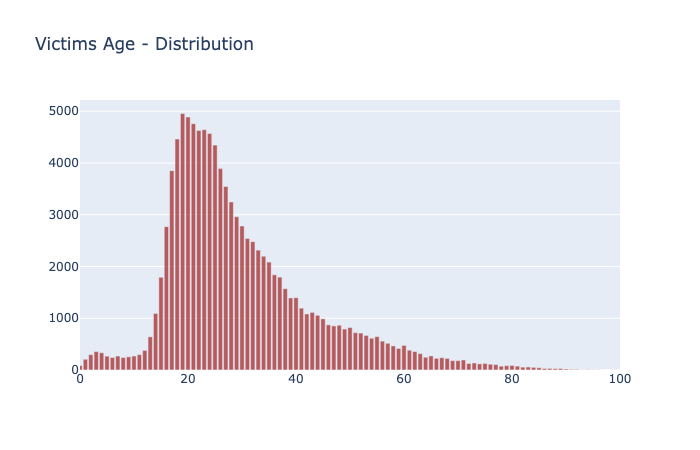

In [44]:
victim_age_groups = {}
for i, row in gun_df.iterrows():
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_age_map']:
            ag = row['participant_age_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1
                
trace1 = go.Bar(x=list(victim_age_groups.keys()),
                y=list(victim_age_groups.values()),
                opacity=0.75, name="month",
                marker=dict(color='brown'))
layout = dict(height=400,
              title='Victims Age - Distribution',
              xaxis=dict(range=[0, 100]),
              legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig); #to use plotly interactive graph, download notebook
fig.show("png");

#### Age Group

In [45]:
# Create function to clean up age groups
def agegroup_cleanup(row):
    
    agegroup_row_values = []   
    agegroup_row = str(row).split("||")
    
    for row in agegroup_row :
        agegroup_row_value = str(row).split("::")
        if len(agegroup_row_value) > 1 :
            agegroup_row_values.append(agegroup_row_value[1])
                
    return agegroup_row_values

# Apply function and create new columns for age groups
agegroupvalues = gun_df['participant_age_group'].apply(agegroup_cleanup)
gun_df["agegroup_child"] = agegroupvalues.apply(lambda x: x.count("Child 0-11"))
gun_df["agegroup_teen"] = agegroupvalues.apply(lambda x: x.count("Teen 12-17"))
gun_df["agegroup_adult"] = agegroupvalues.apply(lambda x: x.count("Adult 18+"))
gun_df["agegroup_unknown"] = agegroupvalues.apply(lambda x: x.count("Unknown"))

In [46]:
gun_df.loc[:,['participant_age_group','agegroup_child','agegroup_teen','agegroup_adult','agegroup_unknown']].head()

participant_age_group  agegroup_child  agegroup_teen  \
278                  0::Adult 18+               0              0   
279                    0::Unknown               0              0   
280    0::Adult 18+||1::Adult 18+               0              0   
281    0::Adult 18+||1::Adult 18+               0              0   
282  0::Child 0-11||1::Teen 12-17               1              1   

     agegroup_adult  agegroup_unknown  
278               1                 0  
279               0                 1  
280               2                 0  
281               2                 0  
282               0                 0

#### Gender

In [47]:
gun_df['participant_gender']

278                0::Female
279                     None
280         0::Male||1::Male
281         0::Male||1::Male
282                0::Female
                 ...        
239672             0::Female
239673      0::Male||1::Male
239674               0::Male
239675               0::Male
239676    0::Female||1::Male
Name: participant_gender, Length: 239399, dtype: object

In [48]:
def separate(df):
    df = df.split("||")
    df = [(x.split("::")) for x in df]
    y = []
    for  i in range (0, len(df)):
        y.append(df[i][-1])
    return(y) 

In [49]:
gun_df['participant_gender'] = gun_df['participant_gender'].fillna("None")

In [50]:
gun_df['gender'] = gun_df['participant_gender'].apply(lambda x: separate(x))
gun_df['num_males'] = gun_df['gender'].apply(lambda x: x.count('Male'))
gun_df['num_females'] = gun_df['gender'].apply(lambda x: x.count('Female'))

In [51]:
gun_df['participant_gender'].apply(lambda x: separate(x))

278             [Female]
279               [None]
280         [Male, Male]
281         [Male, Male]
282             [Female]
               ...      
239672          [Female]
239673      [Male, Male]
239674            [Male]
239675            [Male]
239676    [Female, Male]
Name: participant_gender, Length: 239399, dtype: object

In [52]:
gun_df.head()

incident_id       date       state city_or_county  \
278        95289 2014-01-01    Michigan       Muskegon   
279        92401 2014-01-01  New Jersey         Newark   
280        92383 2014-01-01    New York         Queens   
281        92142 2014-01-01    New York       Brooklyn   
282        95261 2014-01-01    Missouri    Springfield   

                         address  n_killed  n_injured  \
278  300 block of Monroe Avenue          0          0   
279               Central Avenue         0          0   
280                 113th Avenue         1          0   
281              St. Johns Place         0          1   
282     Beverly Hills and Temple         0          1   

                                         incident_url  \
278  http://www.gunviolencearchive.org/incident/95289   
279  http://www.gunviolencearchive.org/incident/92401   
280  http://www.gunviolencearchive.org/incident/92383   
281  http://www.gunviolencearchive.org/incident/92142   
282  http://www.gunviolencearchive.org/incident/95261   

                                                                                                                           source_url  \
278                                           http://www.mlive.com/news/muskegon/index.ssf/2014/01/police_celebratory_gunfire_in.html   
279  http://www.nj.com/essex/index.ssf/2014/01/newark_police_open_fire_after_suspect_threatened_officers_with_gun.html#incart_river_d   
280                                                 http://www.timesledger.com/stories/2014/2/firstmurderupdate_web_2014_01_02_q.html   
281                                  http://www.nydailynews.com/new-york/nyc-crime/2-die-spate-nyc-holiday-violence-article-1.1563394   
282                 http://www.ozarksfirst.com/story/deputies-6-year-old-child-shot-rushed-to-hospital/d/story/uzJ0SAO98UyiZK6kmlUNYw   

     incident_url_fields_missing  congressional_district gun_stolen  \
278                        False                     2.0        NaN   
279                        False                    10.0        NaN   
280                        False                     5.0        NaN   
281                        False                     9.0        NaN   
282                        False                     7.0        NaN   

       gun_type                   incident_characteristics  latitude  ...  \
278  0::Unknown                  Shots Fired - No Injuries   43.2301  ...   
279  0::Unknown                  Officer Involved Incident   40.7417  ...   
280  0::Unknown  Shot - Dead (murder, accidental, suicide)   40.7034  ...   
281  0::Unknown                     Shot - Wounded/Injured   40.6715  ...   
282  0::Unknown                     Shot - Wounded/Injured   37.2646  ...   

    state_senate_district  year  month day day_of_week  \
278                  34.0  2014    Jan  01         Wed   
279                  29.0  2014    Jan  01         Wed   
280                  14.0  2014    Jan  01         Wed   
281                  20.0  2014    Jan  01         Wed   
282                  30.0  2014    Jan  01         Wed   

                        participant_type_map     participant_age_map  \
278                          {'0': 'Victim'}                      {}   
279                                       {}                      {}   
280  {'0': 'Victim', '1': 'Subject-Suspect'}  {'0': '22', '1': '26'}   
281  {'0': 'Victim', '1': 'Subject-Suspect'}             {'0': '34'}   
282  {'0': 'Victim', '1': 'Subject-Suspect'}   {'0': '6', '1': '12'}   

         participant_gender_map agegroup_child agegroup_teen agegroup_adult  \
278             {'0': 'Female'}              0             0              1   
279                          {}              0             0              0   
280  {'0': 'Male', '1': 'Male'}              0             0              2   
281  {'0': 'Male', '1': 'Male'}              0             0              2   
282             {'0': 'Female'}              1             1              0   



In [53]:
## Find gender groups 
suspect_gender_groups = {}
victim_gender_groups = {}
for i, row in gun_df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_gender_map']:
            g = row['participant_gender_map'][suspect]
            if g not in suspect_gender_groups:
                suspect_gender_groups[g] = 0 
            else:
                suspect_gender_groups[g] += 1
                        
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_gender_map']:
            g = row['participant_gender_map'][victim]
            if g not in victim_gender_groups:
                victim_gender_groups[g] = 0 
            else:
                victim_gender_groups[g] += 1

In [54]:
suspect_gender_groups

{'Male': 167472, 'Female': 11736}

In [55]:
victim_gender_groups

{'Female': 30355, 'Male': 135647, 'Male, female': 0}

In [56]:
gun_df['num_males'].sum()

303121

In [57]:
gun_df['num_females'].sum()

42093

## Clean & Export Datasets

In [58]:
location_df = gun_df[['incident_id','n_killed', 'n_injured','state', 'city_or_county', 'latitude', 'longitude', 
                      'location_description', 'state_house_district', 'state_senate_district',
                      'congressional_district']]

In [59]:
location_df.head(1)

incident_id  n_killed  n_injured     state city_or_county  latitude  \
278        95289         0          0  Michigan       Muskegon   43.2301   

     longitude location_description  state_house_district  \
278   -86.2514                  NaN                  92.0   

     state_senate_district  congressional_district  
278                   34.0                     2.0

### Drop Columns

In [60]:
cols_to_drop = ['participant_relationship', 'location_description', 'participant_name', 
                'incident_url_fields_missing', 'source_url', 'sources', 'gun_stolen', 'n_guns_involved',
                'address', 'notes', 'participant_type_map', 'participant_age_map', 'participant_gender_map', 
                'gender','incident_url', 'gun_type', 'incident_characteristics', 'participant_age_group', 
                'participant_age','participant_gender','participant_status', 'participant_type']
#'latitude', 'longitude', 'state_house_district', 'state_senate_district', 'congressional_district'

In [61]:
# Check if columns are correctly dropped
gun_df.drop(cols_to_drop, axis=1).isnull().sum()

incident_id                   0
date                          0
state                         0
city_or_county                0
n_killed                      0
n_injured                     0
congressional_district    11941
latitude                   7921
longitude                  7921
state_house_district      38742
state_senate_district     32310
year                          0
month                         0
day                           0
day_of_week                   0
agegroup_child                0
agegroup_teen                 0
agegroup_adult                0
agegroup_unknown              0
num_males                     0
num_females                   0
dtype: int64

In [62]:
# Drop columns
gun_df_cleaned = gun_df.drop(cols_to_drop, axis=1)
gun_df_cleaned.head()

incident_id       date       state city_or_county  n_killed  n_injured  \
278        95289 2014-01-01    Michigan       Muskegon         0          0   
279        92401 2014-01-01  New Jersey         Newark         0          0   
280        92383 2014-01-01    New York         Queens         1          0   
281        92142 2014-01-01    New York       Brooklyn         0          1   
282        95261 2014-01-01    Missouri    Springfield         0          1   

     congressional_district  latitude  longitude  state_house_district  \
278                     2.0   43.2301   -86.2514                  92.0   
279                    10.0   40.7417   -74.1695                  29.0   
280                     5.0   40.7034   -73.7474                  33.0   
281                     9.0   40.6715   -73.9476                  43.0   
282                     7.0   37.2646   -93.3007                 131.0   

     state_senate_district  year month day day_of_week  agegroup_child  \
278                   34.0  2014   Jan  01         Wed               0   
279                   29.0  2014   Jan  01         Wed               0   
280                   14.0  2014   Jan  01         Wed               0   
281                   20.0  2014   Jan  01         Wed               0   
282                   30.0  2014   Jan  01         Wed               1   

     agegroup_teen  agegroup_adult  agegroup_unknown  num_males  num_females  
278              0               1                 0          0            1  
279              0               0                 1          0            0  
280              0               2                 0          2            0  
281              0               2                 0          2            0  
282              1               0                 0          0            1

### Export Datasets

In [63]:
gun_df_cleaned.to_csv('./data/gun_violence_cleaned.csv', index=False)
location_df.to_csv('./data/location.csv', index=False)

## Summary
- Original gun violence dataset has been cleaned and analyzed.
- Number of incidents have been increasing YoY from 2014 to 2017. Timing seems to play a factor in these incidents especially on weekends and holidays.
- There is a vast difference in gun violence in the different states and therefore I will be collecting more state information to further explore the relationship between gun violence casualties and other factors such as population, income, laws, election results (whether they're democrat or republican), total weapons registered.